<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300"></center><br/>

# Assignment: Notebook for Peer Assignment

Estimated time needed: 60 minutes


# Assignment Scenario

Congratulations! You have just been hired by a US Weather forecast firm as a data scientist.

The company is considering the weather condition to help predict the possibility of precipitations, which involves using various local climatological variables, including temperature, wind speed, humidity, dew point, and pressure. The data you will be handling was collected by a NOAA weather station located at the John F. Kennedy International Airport in Queens, New York.

Your task is to provide a high level analysis of weather data in JFK Airport. Your stakeholders want to understand the current and historical record of precipitations based on different variables. For now they are mainly interested in a macro-view of JFK Airport Weather, and how it relates to the possibility to rain because it will affect flight delays and etc.


# Introduction

This project relates to the NOAA Weather Dataset - JFK Airport (New York). The original dataset contains 114,546 hourly observations of 12 local climatological variables (such as temperature and wind speed) collected at JFK airport. This dataset can be obtained for free from the IBM Developer [Data Asset Exchange](https://developer.ibm.com/exchanges/data/all/jfk-weather-data/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork926-2022-01-01). 

For this project, you will be using a subset dataset, which contains 5727 rows (about 5% or original rows) and 9 columns. The end goal will be to predict the precipitation using some of the available features. In this project, you will practice reading data files, preprocessing data, creating models, improving models and evaluating them to ultimately choose the best model.




## Table of Contents:

Using this R notebook you will complete **10 tasks**:
* [0. Import Modules](#cell0)
* [1. Download and Unzip NOAA Weather Dataset](#cell1)
* [2. Read Dataset into Project](#cell2)
* [3. Select Subset of Columns](#cell3)
* [4. Clean Up Columns](#cell4)
* [5. Convert Columns to Numerical Types](#cell5)
* [6. Rename Columns](#cell6)
* [7. Exploratory Data Analysis](#cell7)
* [8. Linear Regression](#cell8)
* [9. Improve the Model](#cell9)
* [10. Find Best Model](#cell10)


<a id="cell0"></a>
## 0. Import required modules

Below, install "tidymodels", additionally "rlang" should be updated in order to properly run "tidymodels". 


In [1]:
# Install tidymodels if you haven't done so
install.packages("rlang")
install.packages("tidymodels")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


**Note: After installing the packages, restart the kernel. Without installing the packages again, load them. Tidyverse and Tidymodels will be the two main packages you will use.**


In [1]:
# Library for modeling
library(tidymodels)

# Load tidyverse
library(tidyverse)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──
✔ broom        1.0.4     ✔ recipes      1.0.5
✔ dials        1.2.0     ✔ rsample      1.1.1
✔ dplyr        1.1.2     ✔ tibble       3.2.1
✔ ggplot2      3.4.2     ✔ tidyr        1.3.0
✔ infer        1.0.4     ✔ tune         1.1.1
✔ modeldata    1.1.0     ✔ workflows    1.1.3
✔ parsnip      1.1.0     ✔ workflowsets 1.0.1
✔ purrr        1.0.1     ✔ yardstick    1.2.0
── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Search for functions across packages at https://www.tidymodels.org/find/
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ stringr 1.5.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_fa


### Understand the Dataset

The original NOAA JFK dataset contains 114,546 hourly observations of various local climatological variables (including temperature, wind speed, humidity, dew point, and pressure). 

In this project you will use a sample dataset, which is around 293 KB. [Link to the sample dataset](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz).

The sample contains 5727 rows (about 5% or original rows) and 9 columns, which are:
- DATE
- HOURLYDewPointTempF
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYWETBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYSeaLevelPressure
- HOURLYStationPressure

The original dataset is much bigger. Feel free to explore the original dataset. [Link to the original dataset.](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa_weather.html) 

For more information about the dataset, checkout the [preview](https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/data-preview/index.html?_ga=2.176781478.281508226.1616293518-1509963377.1616117067&cm_mc_uid=90945889198916153255549&cm_mc_sid_50200000=64650651616293516933) of NOAA Weather - JFK Airport.


<a id="cell1"></a>

## 1. Download NOAA Weather Dataset

Use the `download.file()` function to download the sample dataset from the URL below.

URL = 'https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz'


In [2]:
# url where the data is located
url <- "https://dax-cdn.cdn.appdomain.cloud/dax-noaa-weather-data-jfk-airport/1.1.4/noaa-weather-sample-data.tar.gz"

# download the file
download.file(url, destfile = "lax_to_jfk.tar.gz")

# untar the file so we can get the csv only
# if you run this on your local machine, then can remove tar = "internal" 
untar("lax_to_jfk.tar.gz")

Warning message in system(paste(TAR, "--version >", tf, "2>&1")):
“error in running command”Warning message in system(cmd):
“error in running command”Warning message in untar("lax_to_jfk.tar.gz"):
“‘/usr/bin/gzip -dc 'lax_to_jfk.tar.gz' | /bin/gtar -xf '-'’ returned error code 127”

Untar the zipped file.


In [3]:
untar("noaa_weather_sample_data.tar.gz")

Warning message in file(con, "rb"):
“cannot open file 'noaa_weather_sample_data.tar.gz': No such file or directory”

ERROR: Error in file(con, "rb"): cannot open the connection


<a id="cell2"></a>
## 2. Extract and Read into Project
We start by reading in the raw dataset. You should specify the file name as "noaa-weather-sample-data/jfk_weather_sample.csv".


In [4]:
weather_data <- read_csv("noaa-weather-sample-data/jfk_weather_sample.csv")

Parsed with column specification:
cols(
  DATE = col_datetime(format = ""),
  HOURLYDewPointTempF = col_double(),
  HOURLYRelativeHumidity = col_double(),
  HOURLYDRYBULBTEMPF = col_double(),
  HOURLYWETBULBTEMPF = col_double(),
  HOURLYPrecip = col_character(),
  HOURLYWindSpeed = col_double(),
  HOURLYSeaLevelPressure = col_double(),
  HOURLYStationPressure = col_double()
)
Warning message:
“1 parsing failure.
 row                 col               expected actual                                              file
1443 HOURLYDewPointTempF no trailing characters      s 'noaa-weather-sample-data/jfk_weather_sample.csv'
”

Next, display the first few rows of the dataframe.


In [5]:
head(weather_data)

DATE,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYSeaLevelPressure,HOURLYStationPressure
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
2015-07-25 13:51:00,60,46,83,68,0.00,13,30.01,29.99
2016-11-18 23:51:00,34,48,53,44,0.00,6,30.05,30.03
2013-01-06 08:51:00,33,89,36,35,0.00,13,30.14,30.12
2011-01-27 16:51:00,18,48,36,30,0.00,14,29.82,29.80
2015-01-03 12:16:00,27,61,39,34,T,11,NA,30.50
2013-02-15 20:51:00,35,79,41,38,0.00,6,29.94,29.92


Also, take a `glimpse` of the dataset to see the different column data types and make sure it is the correct subset dataset with about 5700 rows and 9 columns.


In [6]:
glimpse(weather_data)

Rows: 5,727
Columns: 9
$ DATE                   <dttm> 2015-07-25 13:51:00, 2016-11-18 23:51:00, 2013…
$ HOURLYDewPointTempF    <dbl> 60, 34, 33, 18, 27, 35, 4, 14, 51, 71, 76, 19, …
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 94, 79, 37,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 73, 83, 44,…
$ HOURLYWETBULBTEMPF     <dbl> 68, 44, 35, 30, 34, 38, 15, 21, 52, 72, 78, 35,…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "T", "0.00", "0…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 5, 21, 7, 17, …
$ HOURLYSeaLevelPressure <dbl> 30.01, 30.05, 30.14, 29.82, NA, 29.94, 30.42, 3…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


<a id="cell3"></a>
## 3. Select Subset of Columns

The end goal of this project will be to predict `HOURLYprecip` (precipitation) using a few other variables. Before you can do this, you first need to preprocess the dataset. Section 3 to section 6 focuses on preprocessing.

The first step in preprocessing is to select a subset of data columns and inspect the column types.

The key columns that we will explore in this project are:
- HOURLYRelativeHumidity
- HOURLYDRYBULBTEMPF
- HOURLYPrecip
- HOURLYWindSpeed
- HOURLYStationPressure

Data Glossary:
- 'HOURLYRelativeHumidity' is the relative humidity given to the nearest whole percentage.
- 'HOURLYDRYBULBTEMPF' is the dry-bulb temperature and is commonly used as the standard air temperature reported. It is given here in whole degrees Fahrenheit.
- 'HOURLYPrecip' is the amount of precipitation in inches to hundredths over the past hour. For certain automated stations, precipitation will be reported at sub-hourly intervals (e.g. every 15 or 20 minutes) as an accumulated amount of all precipitation within the preceding hour. A “T” indicates a trace amount of precipitation.
- 'HOURLYWindSpeed' is the speed of the wind at the time of observation given in miles per hour (mph).
- 'HOURLYStationPressure' is the atmospheric pressure observed at the station during the time of observation. Given in inches of Mercury (in Hg).

`Select` those five columns and store the modified dataframe as a new variable.


In [7]:
weather_data_new <- weather_data %>% 
    select(c(HOURLYRelativeHumidity, 
             HOURLYDRYBULBTEMPF, 
             HOURLYPrecip, 
             HOURLYWindSpeed, 
             HOURLYStationPressure))

Show the first 10 rows of this new dataframe.


In [8]:
weather_data_new[0:10,]

HOURLYRelativeHumidity,HOURLYDRYBULBTEMPF,HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
46,83,0.00,13,29.99
48,53,0.00,6,30.03
89,36,0.00,13,30.12
48,36,0.00,14,29.80
61,39,T,11,30.50
79,41,0.00,6,29.92
51,19,0.00,0,30.40
65,24,0.00,11,30.35
90,54,0.06,11,30.03


<a id="cell4"></a>
## 4. Clean Up Columns

From the dataframe preview above, we can see that the column `HOURLYPrecip` - which is the hourly measure of precipitation levels - contains both `NA` and `T` values. `T` specifies *trace amounts of precipitation* (meaning essentially no precipitation), while `NA` means *not available*, and is used to denote missing values. Additionally, some values also have "s" at the end of them, indicating that the precipitation was snow. 

Inspect the unique values present in the column `HOURLYPrecip` (with `unique(dataframe$column)`) to see these values.


In [9]:
unique(weather_data$HOURLYPrecip)

[1] "0.00"  "T"     "0.06"  NA      "0.03"  "0.02"  "0.08"  "0.01"  "0.07" 
[10] "0.16"  "0.09"  "0.22"  "0.02s" "0.24"  "0.18"  "0.05"  "0.04"  "0.09s"
[19] "0.11"  "0.14"  "0.25"  "0.10"  "0.01s" "0.58"  "0.12"  "0.13"  "0.46" 
[28] "1.07"  "1.19"  "0.34"  "0.20"  "0.36s" "0.42"  "0.17"  "0.27"  "0.35" 
[37] "0.31"  "0.33"  "0.23"  "0.26"  "0.28"  "0.75"  "0.19"  "0.36"  "0.03s"
[46] "0.07s" "0.54"  "0.59"  "0.21"

Having characters in values (like the "T" and "s" that you see in the unique values) will cause problems when you create a model because values for precipitation should be numerical. So you need to fix these values that have characters. 

Now, for the column `HOURLYPrecip`:
1. Replace all the `T` values with "0.0" and 
2. Remove "s" from values like "0.02s". In R, you can use the method `str_remove(column, pattern = "s$")` to remove the character "s" from the end of values. The "$" tells R to match to the end of values. The `pattern` is a regex pattern. Look at [here](https://www.rdocumentation.org/packages/stringi/versions/1.5.3/topics/about_search_regex?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0151ENSkillsNetwork926-2022-01-01) for more information about regex and matching to strings in R.

Remember that you can use `tidyverse`'s  `mutate()` to update columns.

You can check your work by checking if unique values of `HOURLYPrecip` still contain any `T` or `s`. Store the modified dataframe as a new variable.


In [10]:
weather_data_new$HOURLYPrecip[weather_data_new$HOURLYPrecip == "T"] <- 0.0
weather_data_new <- weather_data_new %>% mutate(HOURLYPrecip = str_remove(HOURLYPrecip, pattern = "s$"))
unique(weather_data_new$HOURLYPrecip)


[1] "0.00" "0"    "0.06" NA     "0.03" "0.02" "0.08" "0.01" "0.07" "0.16"
[11] "0.09" "0.22" "0.24" "0.18" "0.05" "0.04" "0.11" "0.14" "0.25" "0.10"
[21] "0.58" "0.12" "0.13" "0.46" "1.07" "1.19" "0.34" "0.20" "0.36" "0.42"
[31] "0.17" "0.27" "0.35" "0.31" "0.33" "0.23" "0.26" "0.28" "0.75" "0.19"
[41] "0.54" "0.59" "0.21"

In [13]:
map(weather_data_new, ~sum(is.na(.)))
dim(weather_data_new)

$HOURLYRelativeHumidity
[1] 151

$HOURLYDRYBULBTEMPF
[1] 151

$HOURLYPrecip
[1] 1660

$HOURLYWindSpeed
[1] 156

$HOURLYStationPressure
[1] 158

[1] 5727    5

In [20]:
weather_data_drop <- weather_data_new  %>%
                    drop_na(HOURLYPrecip,HOURLYWindSpeed,HOURLYStationPressure)
dim(weather_data_drop)
map(weather_data_drop, ~sum(is.na(.)))

[1] 4063    5

$HOURLYRelativeHumidity
[1] 0

$HOURLYDRYBULBTEMPF
[1] 0

$HOURLYPrecip
[1] 0

$HOURLYWindSpeed
[1] 0

$HOURLYStationPressure
[1] 0

<a id="cell5"></a>
## 5. Convert Columns to Numerical Types
Now that you have removed the characters in the `HOURLYPrecip` column, you can safely covert the column to a numeric type.

First, check the types of the columns. You will notice that all are `dbl` (double or numeric) except for `HOURLYPrecip`, which is `chr` (character or string). Use the `glimpse` function from Tidyverse.


In [22]:
glimpse(weather_data_drop)

Rows: 4,063
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 37, 72, 47,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 44, 57, 78,…
$ HOURLYPrecip           <chr> "0.00", "0.00", "0.00", "0.00", "0", "0.00", "0…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 7, 17, 8, 3, 1…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


Convert `HOURLYPrecip` to the `numeric` type and store the cleaned dataframe as a new variable.


In [23]:
weather_data_new2 <-weather_data_drop
weather_data_new2$HOURLYPrecip <- (as.numeric(weather_data_drop$HOURLYPrecip))

We can now see that all fields have numerical data type.


In [24]:
glimpse(weather_data_new2)  

Rows: 4,063
Columns: 5
$ HOURLYRelativeHumidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 37, 72, 47,…
$ HOURLYDRYBULBTEMPF     <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 44, 57, 78,…
$ HOURLYPrecip           <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,…
$ HOURLYWindSpeed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 7, 17, 8, 3, 1…
$ HOURLYStationPressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40…


<a id="cell6"></a>
## 6. Rename Columns
Let's rename the following columns as:
- 'HOURLYRelativeHumidity' to 'relative_humidity'
- 'HOURLYDRYBULBTEMPF' to 'dry_bulb_temp_f'
- 'HOURLYPrecip' to 'precip'
- 'HOURLYWindSpeed' to 'wind_speed'
- 'HOURLYStationPressure' to 'station_pressure'

You can use `dplyr::rename()`. Then, store the final dataframe as a new variable.


In [25]:
weather_data_new2 <- weather_data_new2 %>%

rename("relative_humidity"="HOURLYRelativeHumidity",
                    'dry_bulb_temp_f'='HOURLYDRYBULBTEMPF',
                    'precip'='HOURLYPrecip',
                    'wind_speed'='HOURLYWindSpeed',
                    'station_pressure'='HOURLYStationPressure')

In [26]:
glimpse(weather_data_new2)  


Rows: 4,063
Columns: 5
$ relative_humidity <dbl> 46, 48, 89, 48, 61, 79, 51, 65, 90, 37, 72, 47, 84, …
$ dry_bulb_temp_f   <dbl> 83, 53, 36, 36, 39, 41, 19, 24, 54, 44, 57, 78, 75, …
$ precip            <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.06…
$ wind_speed        <dbl> 13, 6, 13, 14, 11, 6, 0, 11, 11, 7, 17, 8, 3, 11, 13…
$ station_pressure  <dbl> 29.99, 30.03, 30.12, 29.80, 30.50, 29.92, 30.40, 30.…


<a id="cell7"></a>
## 7. Exploratory Data Analysis
Now that you have finished preprocessing the dataset, you can can start exploring the columns more.

First, split the data into a training and testing set. Splitting a dataset is done randomly, so to have reproducible results set the seed = 1234. Also, use 80% of the data for training.


In [27]:
set.seed(1234)
wea_split <- initial_split(weather_data_new2, prop = 0.8)  
train_data <- training(wea_split)
test_data <- testing(wea_split)

Next, looking at just the **training set**, plot histograms or box plots of the variables (`relative_humidity`, `dry_bulb_temp_f`, `precip`, `wind_speed`,  `station_pressure`) for an intial look of their distributions using `tidyverse`'s `ggplot`. Leave the testing set as is because it is good practice to not see the testing set until evaluating the final model.


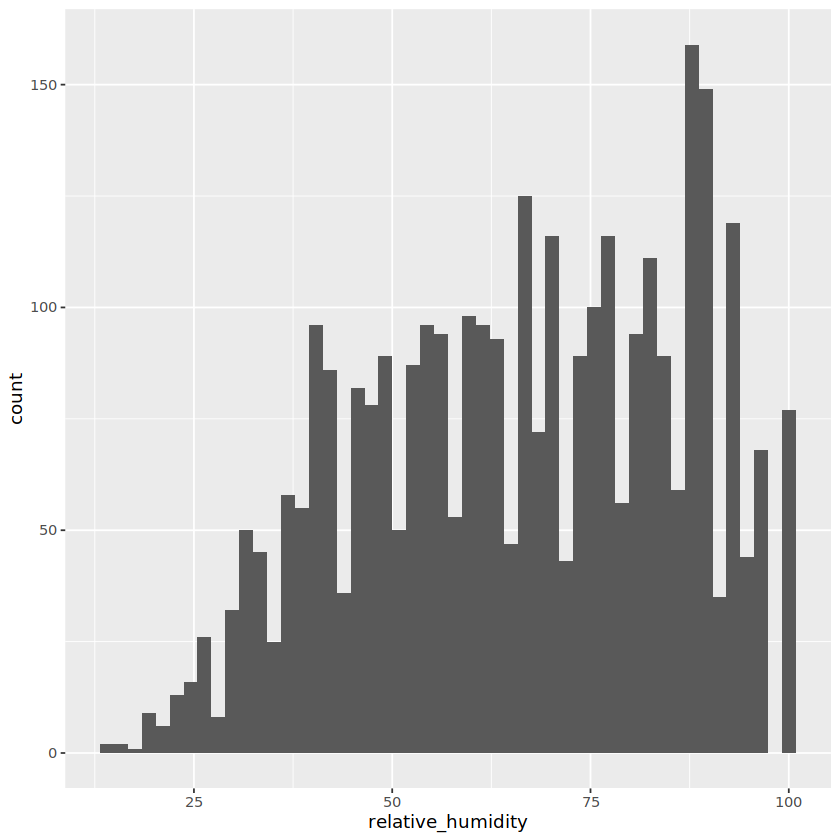

In [28]:
train_hist1 <-ggplot(train_data, aes(x=relative_humidity)) + 
  geom_histogram(bins=50, )
train_hist1 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

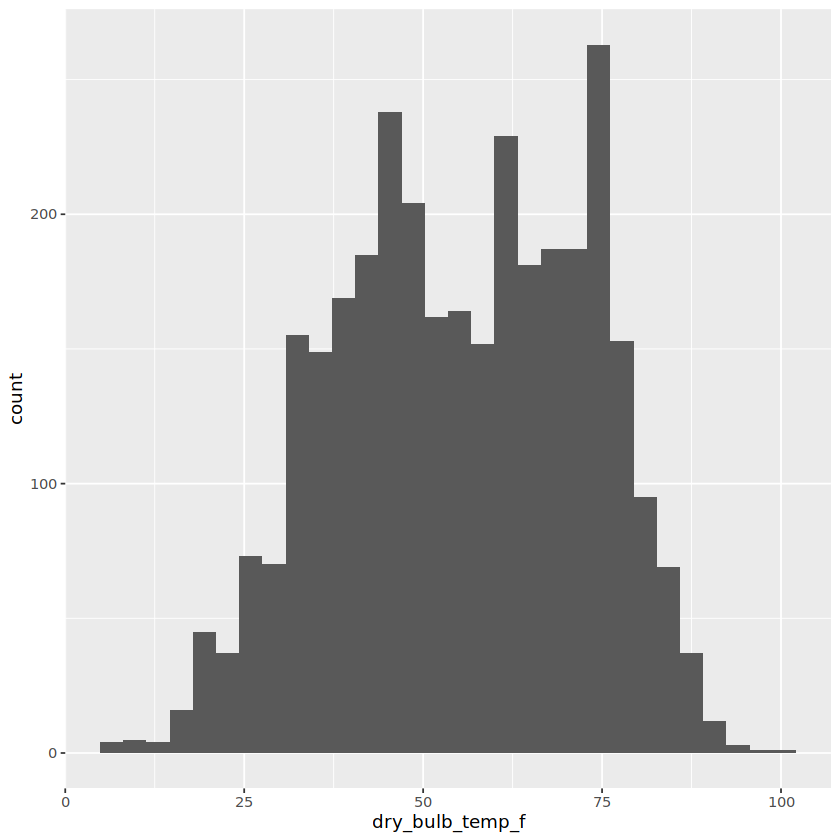

In [29]:
train_hist2 <-ggplot(train_data, aes(x=dry_bulb_temp_f)) + 
  geom_histogram()
train_hist2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

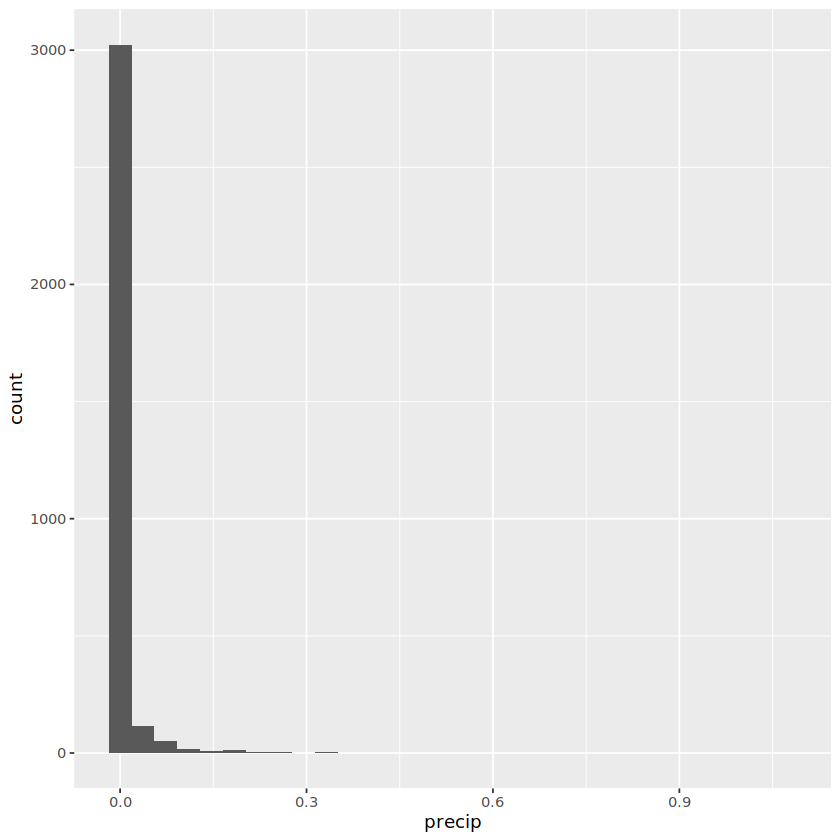

In [30]:
train_hist3 <-ggplot(train_data, aes(x=precip)) + 
  geom_histogram()
train_hist3

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

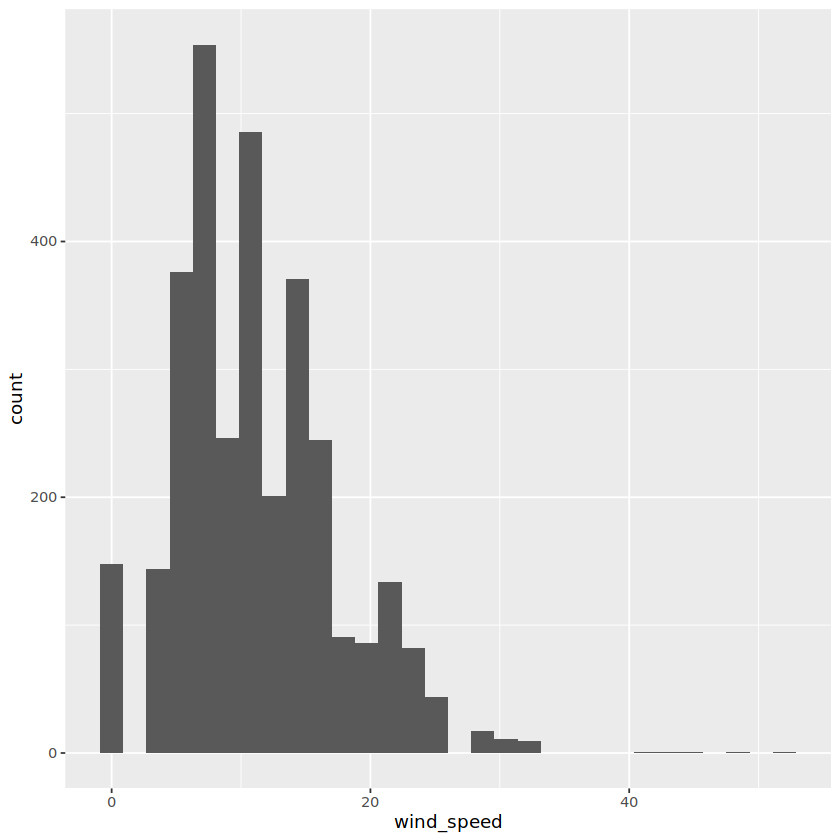

In [31]:
train_hist4 <-ggplot(train_data, aes(x=wind_speed)) + 
  geom_histogram()
train_hist4

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

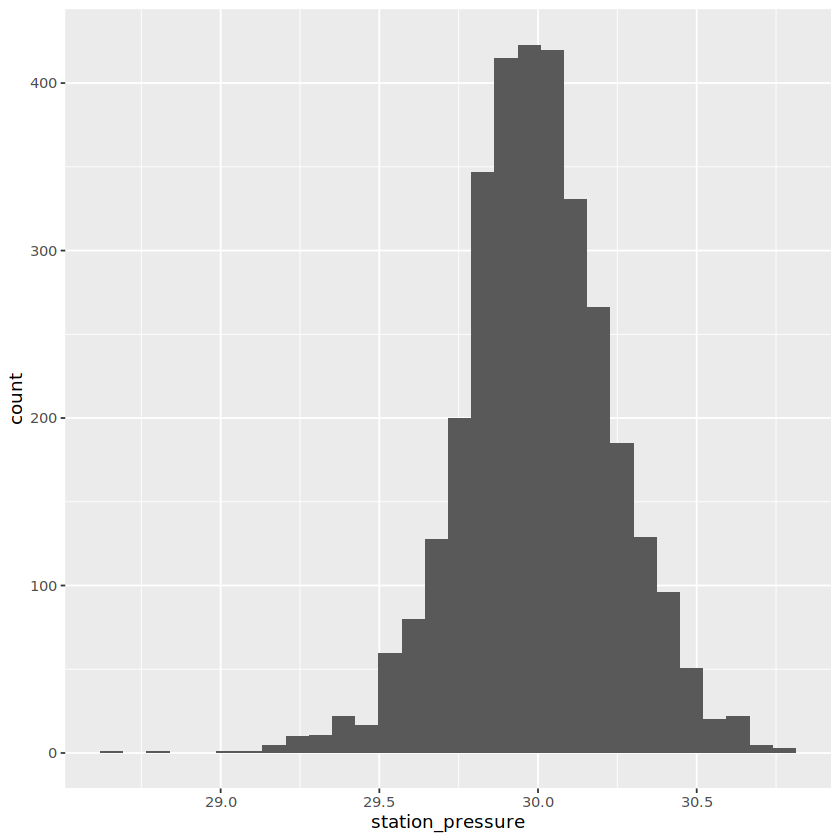

In [32]:
train_hist5 <-ggplot(train_data, aes(x=station_pressure)) + 
  geom_histogram()
train_hist5

<a id="cell8"></a>
## 8. Linear Regression 
After exploring the dataset more, you are now ready to start creating models to predict the precipitation (`precip`).

Create simple linear regression models where `precip` is the response variable and each of `relative_humidity`, `dry_bulb_temp_f`,`wind_speed` or `station_pressure` will be a predictor variable, e.g. `precip ~ relative_humidity`, `precip ~ dry_bulb_temp_f`, etc. for a total of four simple models. 
Additionally, visualize each simple model with a scatter plot.


In [33]:
lm_spec <- linear_reg() %>%
  set_engine(engine = "lm")

parsnip model object


Call:
stats::lm(formula = precip ~ relative_humidity, data = data)

Coefficients:
      (Intercept)  relative_humidity  
         -0.02008            0.00040  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.04623469


parsnip model object


Call:
stats::lm(formula = precip ~ relative_humidity, data = data)

Coefficients:
      (Intercept)  relative_humidity  
       -0.0220209          0.0004479  


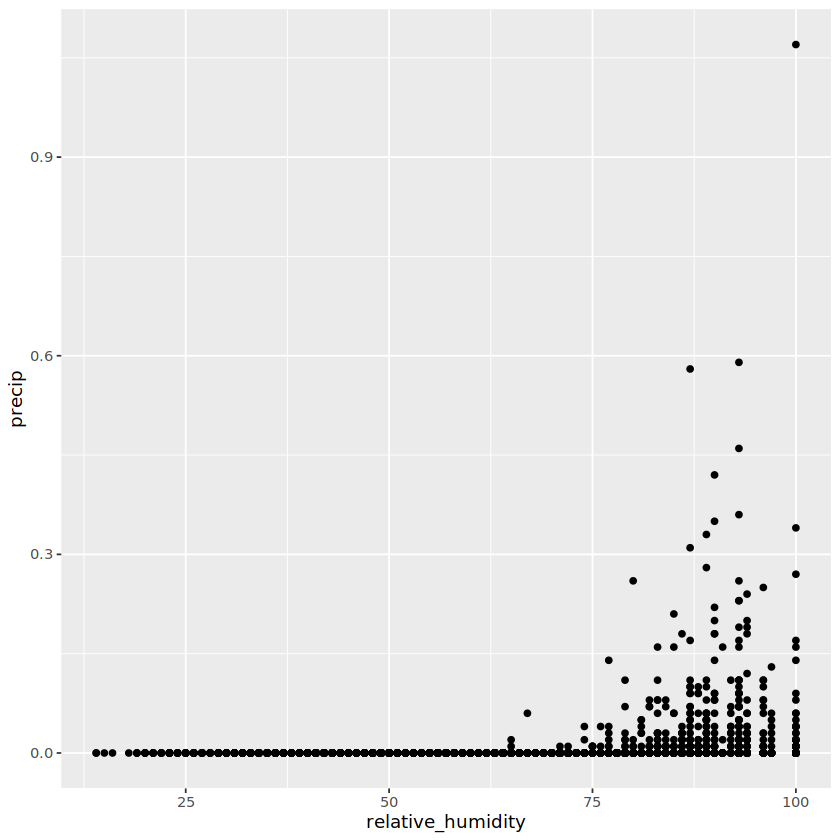

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.02459572


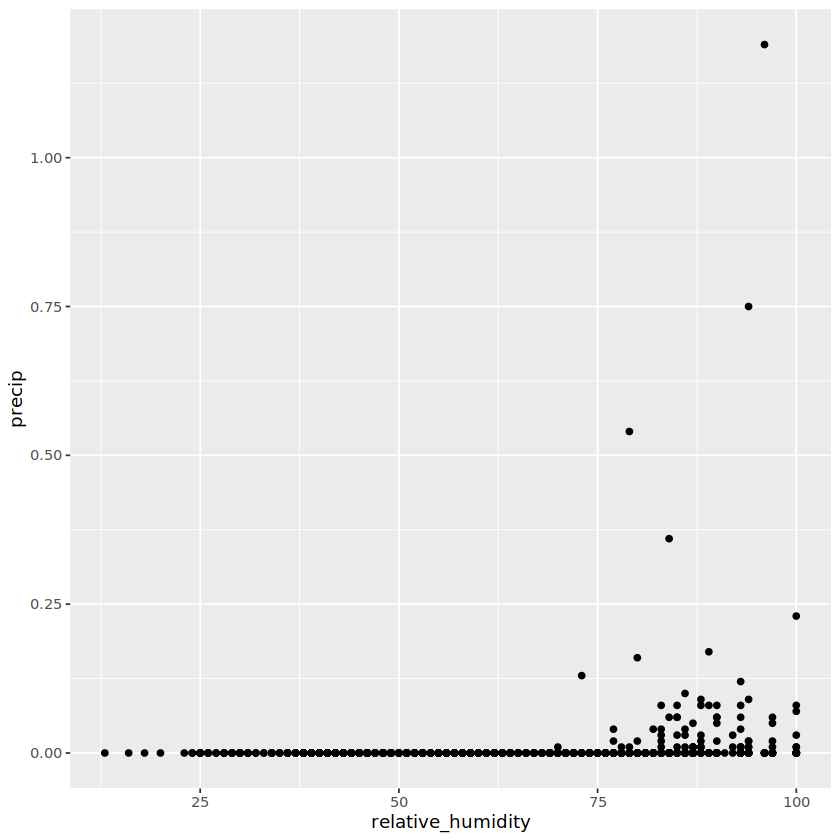

In [72]:
train_fit1 <- lm_spec %>% 
    fit(precip ~ relative_humidity, data = train_data)
train_fit1

train_plot1 <- ggplot(train_data, aes(x=relative_humidity, y=precip)) + 
  geom_point()
train_plot1

test_results_1 <- train_fit1 %>%
  # Make the predictions and save the predicted values
  predict(new_data = train_data) %>%
  # Create a new column to save the true values
  mutate(truth = train_data$precip)

rsq(test_results_1, truth = truth,
    estimate = .pred)



test_fit1 <- lm_spec %>% 
    fit(precip ~ relative_humidity, data = test_data)
test_fit1

test_plot1 <- ggplot(test_data, aes(x=relative_humidity, y=precip)) + 
  geom_point()
test_plot1

test_results_2<- test_fit1 %>%
  # Make the predictions and save the predicted values
  predict(new_data = test_data) %>%
  # Create a new column to save the true values
  mutate(truth = test_data$precip)

rsq(test_results_2, truth = truth,
    estimate = .pred)




parsnip model object


Call:
stats::lm(formula = precip ~ dry_bulb_temp_f, data = data)

Coefficients:
    (Intercept)  dry_bulb_temp_f  
      6.435e-03       -1.353e-06  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,3.966244e-07


parsnip model object


Call:
stats::lm(formula = precip ~ dry_bulb_temp_f, data = data)

Coefficients:
    (Intercept)  dry_bulb_temp_f  
     -0.0004201        0.0001362  


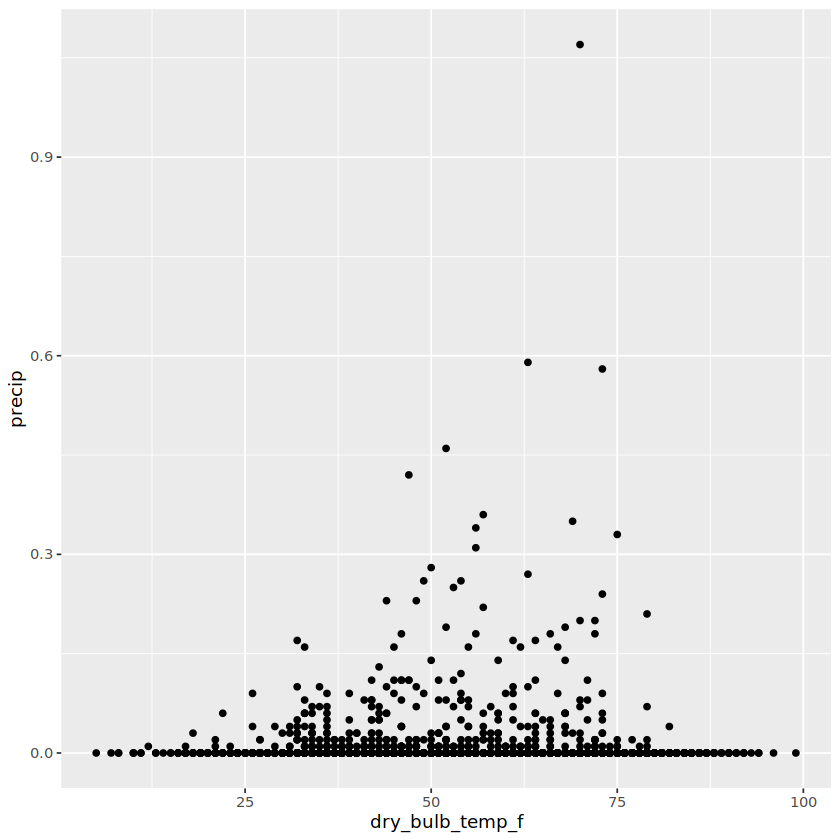

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.001792602


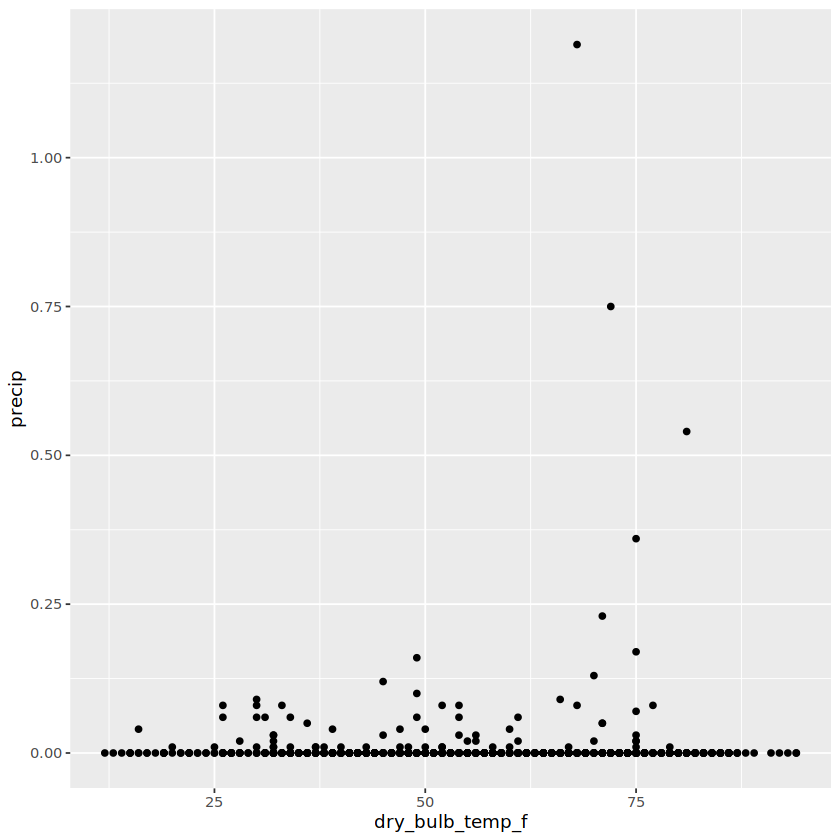

In [76]:
train_fit2 <- lm_spec %>% 
    fit(precip ~ dry_bulb_temp_f, data = train_data)
train_fit2

train_plot2 <- ggplot(train_data, aes(x=dry_bulb_temp_f, y=precip)) + 
  geom_point()
train_plot2


train_results_2 <- train_fit2 %>%
  # Make the predictions and save the predicted values
  predict(new_data = train_data) %>%
  # Create a new column to save the true values
  mutate(truth = train_data$precip)

rsq(train_results_2, truth = truth,
    estimate = .pred)



test_fit2 <- lm_spec %>% 
    fit(precip ~ dry_bulb_temp_f, data = test_data)
test_fit2

test_plot2 <- ggplot(test_data, aes(x=dry_bulb_temp_f, y=precip)) + 
  geom_point()
test_plot2

test_results_dryb<- test_fit2 %>%
  # Make the predictions and save the predicted values
  predict(new_data = test_data) %>%
  # Create a new column to save the true values
  mutate(truth = test_data$precip)

rsq(test_results_dryb, truth = truth,
    estimate = .pred)





parsnip model object


Call:
stats::lm(formula = precip ~ wind_speed, data = data)

Coefficients:
(Intercept)   wind_speed  
  0.0008001    0.0004939  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.006955089


parsnip model object


Call:
stats::lm(formula = precip ~ wind_speed, data = data)

Coefficients:
(Intercept)   wind_speed  
  0.0005634    0.0005939  


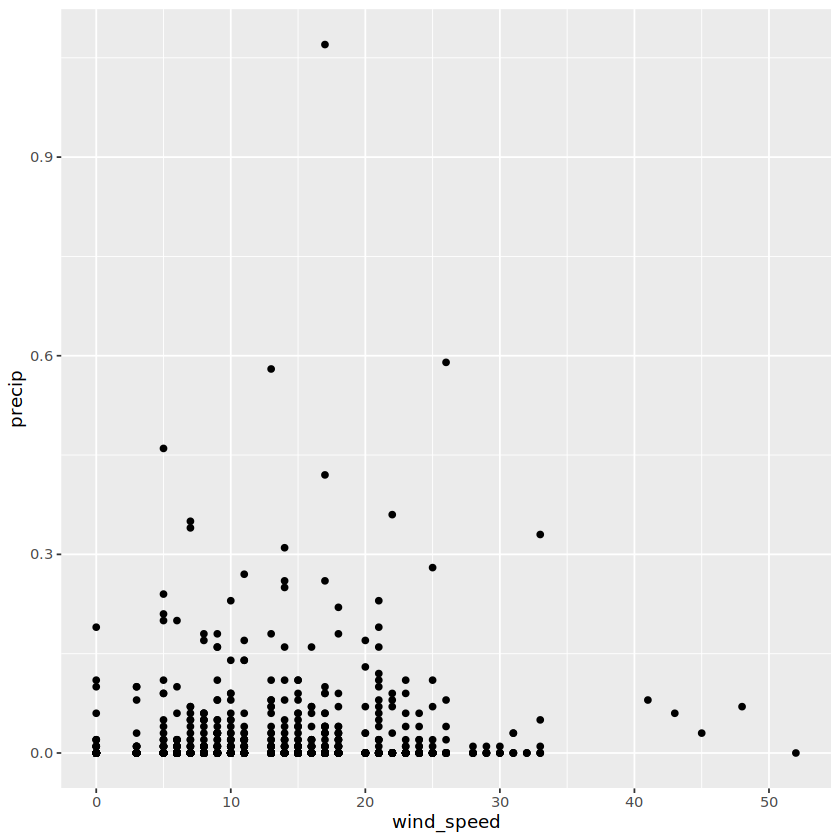

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.004105862


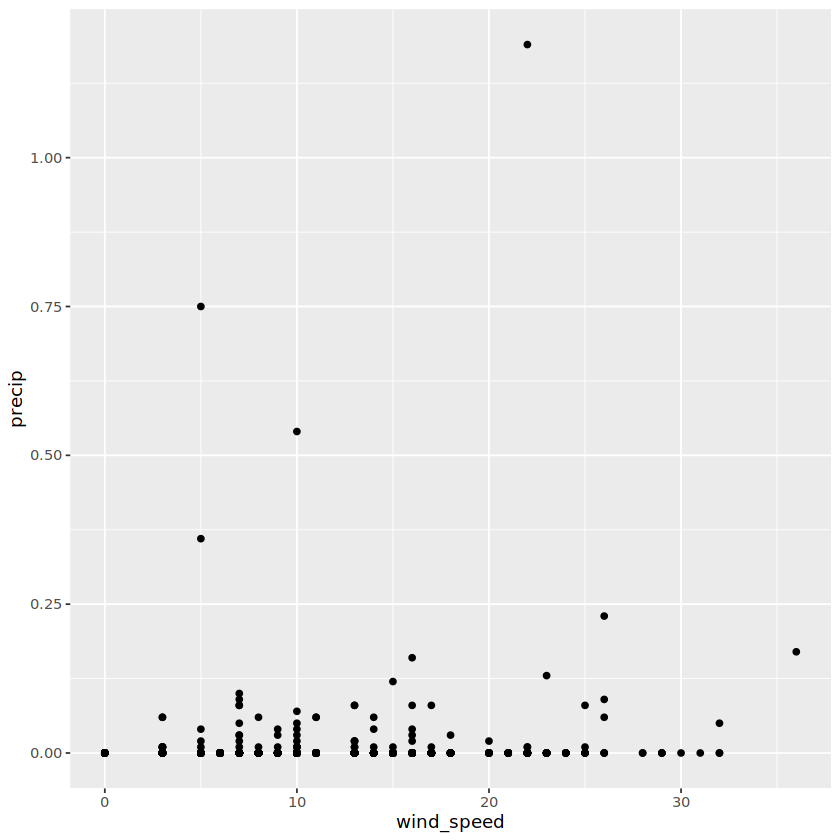

In [77]:
train_fit3 <- lm_spec %>% 
    fit(precip ~ wind_speed, data = train_data)
train_fit3

train_plot3 <- ggplot(train_data, aes(x=wind_speed, y=precip)) + 
  geom_point()
train_plot3

train_results_3 <- train_fit3 %>%
  # Make the predictions and save the predicted values
  predict(new_data = train_data) %>%
  # Create a new column to save the true values
  mutate(truth = train_data$precip)

rsq(train_results_3, truth = truth,
    estimate = .pred)



test_fit3 <- lm_spec %>% 
    fit(precip ~ wind_speed, data = test_data)
test_fit3

test_plot3 <- ggplot(test_data, aes(x=wind_speed, y=precip)) + 
  geom_point()
test_plot3

test_results_3<- test_fit3 %>%
  # Make the predictions and save the predicted values
  predict(new_data = test_data) %>%
  # Create a new column to save the true values
  mutate(truth = test_data$precip)

rsq(test_results_3, truth = truth,
    estimate = .pred)

parsnip model object


Call:
stats::lm(formula = precip ~ station_pressure, data = data)

Coefficients:
     (Intercept)  station_pressure  
         0.67954          -0.02244  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.02136029


parsnip model object


Call:
stats::lm(formula = precip ~ station_pressure, data = data)

Coefficients:
     (Intercept)  station_pressure  
          0.8322           -0.0275  


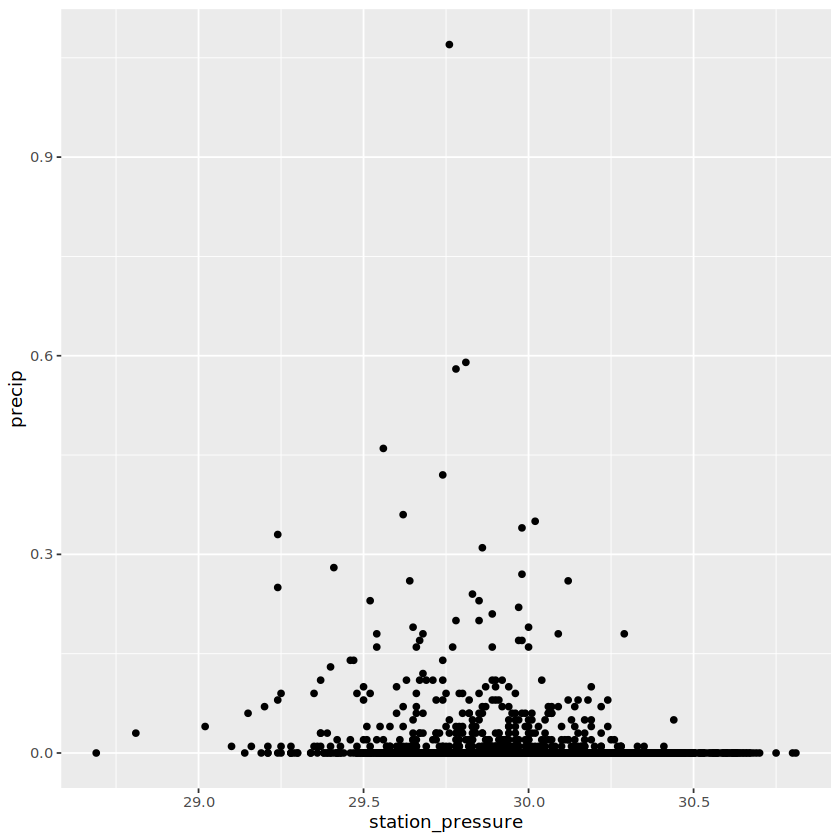

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.004105862


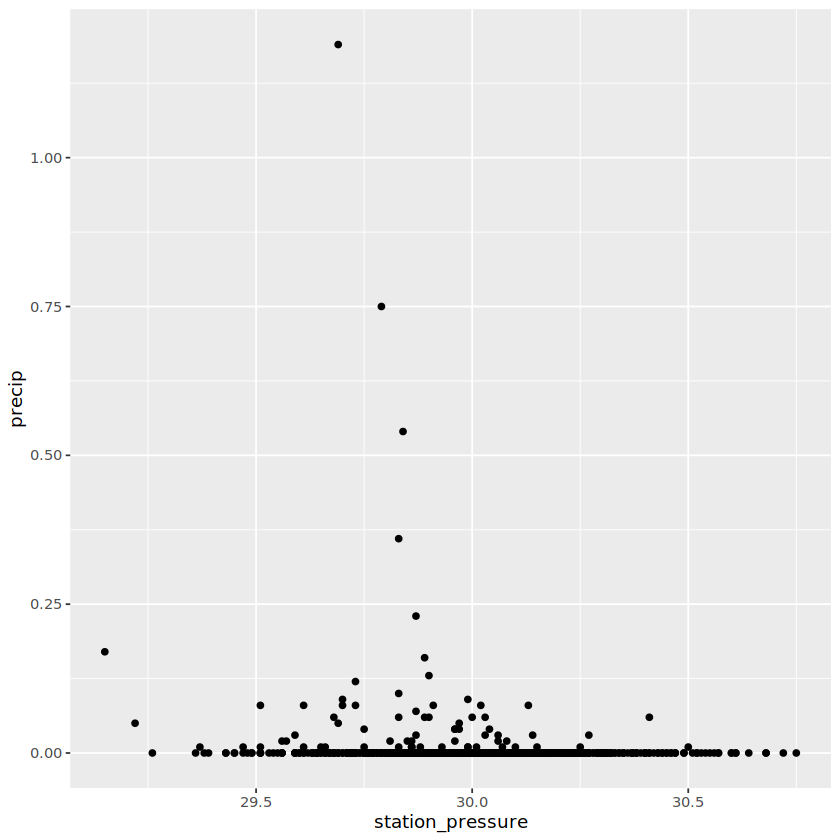

In [78]:
train_fit4 <- lm_spec %>% 
    fit(precip ~ station_pressure, data = train_data)
train_fit4

train_plot4 <- ggplot(train_data, aes(x=station_pressure, y=precip)) + 
  geom_point()
train_plot4


train_results_4 <- train_fit4 %>%
  # Make the predictions and save the predicted values
  predict(new_data = train_data) %>%
  # Create a new column to save the true values
  mutate(truth = train_data$precip)

rsq(train_results_4, truth = truth,
    estimate = .pred)



test_fit4 <- lm_spec %>% 
    fit(precip ~ station_pressure, data = test_data)
test_fit4

test_plot4 <- ggplot(test_data, aes(x=station_pressure, y=precip)) + 
  geom_point()
test_plot4

test_results_4<- test_fit4 %>%
  # Make the predictions and save the predicted values
  predict(new_data = test_data) %>%
  # Create a new column to save the true values
  mutate(truth = test_data$precip)

rsq(test_results_3, truth = truth,
    estimate = .pred)

<a id="cell9"></a>
## 9. Improve the Model
Now, try improving the simple models you created in the previous section. 

Create at least two more models, each model should use at least one of the different techniques:
1. Add more features/predictors
2. Add regularization (L1, L2 or a mix)
3. Add a polynomial component

Also, for each of the models you create, check the model performance using the **training set** and a metric like MSE, RMSE, or R-squared.

Consider using `tidymodels` if you choose to add regularization and tune lambda.


In [38]:
# Pick linear regression
lm_spec <- linear_reg() %>%
  # Set engine
  set_engine(engine = "lm")

# Print the linear function
lm_spec

train_fit5 <- lm_spec %>% 
    fit(precip ~ ., data = train_data)

train_fit5 
train_results <- train_fit5 %>%
  # Make the predictions and save the predicted values
  predict(new_data = train_data) %>%
  # Create a new column to save the true values
  mutate(truth = train_data$precip)

head(train_results)

rmse(train_results, truth = truth,
     estimate = .pred)

rsq(train_results, truth = truth,
    estimate = .pred)

Linear Regression Model Specification (regression)

Computational engine: lm 


parsnip model object


Call:
stats::lm(formula = precip ~ ., data = data)

Coefficients:
      (Intercept)  relative_humidity    dry_bulb_temp_f         wind_speed  
        2.564e-01          4.220e-04         -3.809e-05          6.756e-04  
 station_pressure  
       -9.450e-03  


.pred,truth
<dbl>,<dbl>
-0.0039826626,0.00
-0.0009849945,0.00
-0.0028624684,0.00
0.0181513247,0.00
0.0205373878,0.02
0.0110058531,0.00


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.03569646


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.06728923


In [58]:
#Ridge (L2) Regularization- training set
weather_recipe <- recipe(precip ~ ., data = train_data)
ridge_spec <- linear_reg(penalty = 0.1, mixture = 0.0) %>%
  set_engine("glmnet")
ridge_wf <- workflow() %>%
  add_recipe(weather_recipe)
ridge_fit <- ridge_wf %>%
  add_model(ridge_spec) %>%
  fit(data = train_data)
ridge_fit %>%
  pull_workflow_fit() %>%
  tidy()

train_results6 <- ridge_fit %>%
  # Make the predictions and save the predicted values
  predict(new_data = train_data) %>%
  # Create a new column to save the true values
  mutate(truth = train_data$precip)
head(train_results6)

rmse(train_results6, truth = truth,
     estimate = .pred)

rsq(train_results6, truth = truth,
    estimate = .pred)

term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),1.546579e-01,0.1
relative_humidity,1.064534e-04,0.1
dry_bulb_temp_f,-5.574270e-06,0.1
wind_speed,1.379052e-04,0.1
station_pressure,-5.219971e-03,0.1


.pred,truth
<dbl>,<dbl>
0.003625570,0.00
0.004126036,0.00
0.003619313,0.00
0.009095360,0.00
0.010032589,0.02
0.007535072,0.00


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.03635267


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.06423247


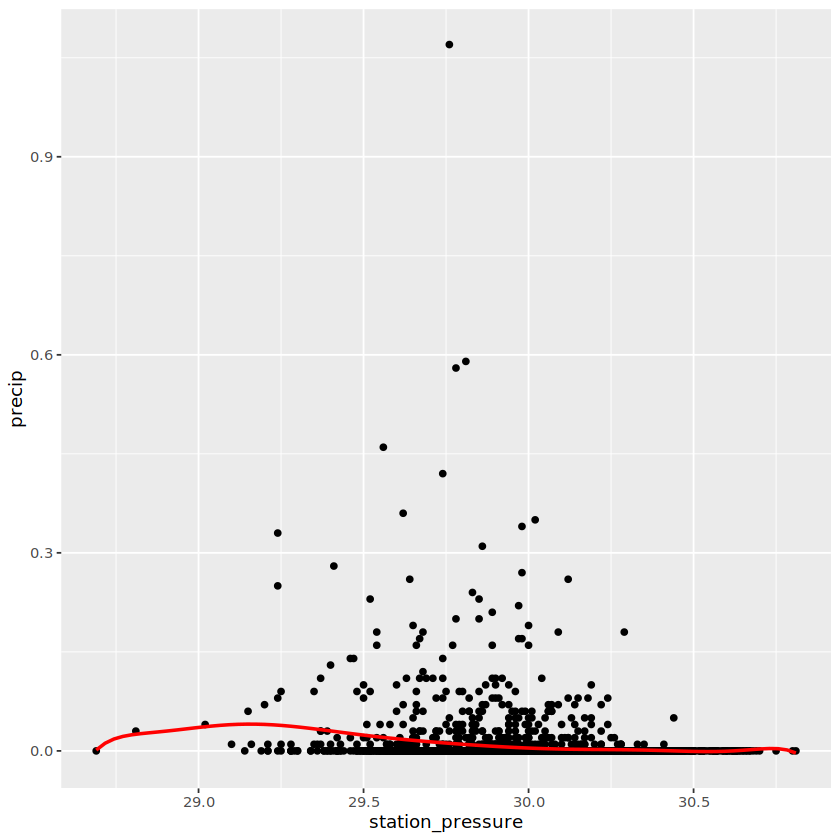

In [53]:
#Add a polynomial component

ggplot(train_data, aes(x=station_pressure, y=precip)) + 
    geom_point() + 
    geom_smooth(method = "lm", 
                formula = y ~ poly(x,10) ,
                col = "red", se = FALSE)


→ A | warning: A correlation computation is required, but `estimate` is constant and has 0 standard deviation, resulting in a divide by 0 error. `NA` will be returned.
There were issues with some computations   A: x1
There were issues with some computations   A: x10
There were issues with some computations   A: x10



penalty,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<fct>
0.001000000,rmse,standard,0.03290471,10,0.004713113,Preprocessor1_Model01
0.001167742,rmse,standard,0.03290987,10,0.004720560,Preprocessor1_Model02
0.001363622,rmse,standard,0.03291933,10,0.004728828,Preprocessor1_Model03
0.001592358,rmse,standard,0.03293510,10,0.004737923,Preprocessor1_Model04
0.001859464,rmse,standard,0.03295994,10,0.004747763,Preprocessor1_Model05


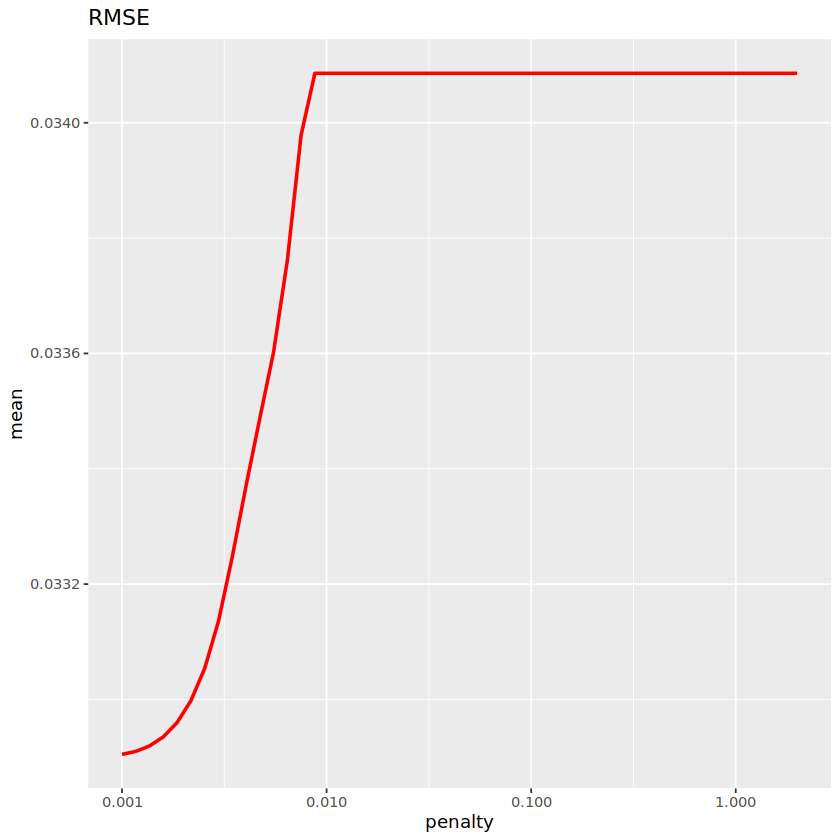

In [59]:
#Tuning L2 
tune_spec <- linear_reg(penalty = tune(), mixture = 1) %>% 
  set_engine("glmnet")

lasso_wf <- workflow() %>%
  add_recipe(weather_recipe)

flight_cvfolds <- vfold_cv(train_data)

lambda_grid <- grid_regular(levels = 50,
  penalty(range = c(-3, 0.3)))

lasso_grid <- tune_grid(
    lasso_wf %>% add_model(tune_spec), 
    resamples = flight_cvfolds, 
    grid = lambda_grid)
show_best(lasso_grid, metric = "rmse")

lasso_grid %>%
  collect_metrics() %>%
  filter(.metric == "rmse") %>%
  ggplot(aes(penalty, mean)) +
  geom_line(size=1, color="red") +
  scale_x_log10() +
  ggtitle("RMSE")

In [60]:
#use lambda= 0.001167742

weather_recipe <- recipe(precip ~ ., data = train_data)
ridge_spec <- linear_reg(penalty = 0.001167742, mixture = 0.0) %>%
  set_engine("glmnet")
ridge_wf <- workflow() %>%
  add_recipe(weather_recipe)
ridge_fit <- ridge_wf %>%
  add_model(ridge_spec) %>%
  fit(data = train_data)
ridge_fit %>%
  pull_workflow_fit() %>%
  tidy()

train_results7 <- ridge_fit %>%
  # Make the predictions and save the predicted values
  predict(new_data = train_data) %>%
  # Create a new column to save the true values
  mutate(truth = train_data$precip)
head(train_results6)

rmse(train_results7, truth = truth,
     estimate = .pred)

rsq(train_results7, truth = truth,
    estimate = .pred)

term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),0.2659229822,0.001167742
relative_humidity,0.0004059020,0.001167742
dry_bulb_temp_f,-0.0000378163,0.001167742
wind_speed,0.0006411037,0.001167742
station_pressure,-0.0097185062,0.001167742


.pred,truth
<dbl>,<dbl>
0.003625570,0.00
0.004126036,0.00
0.003619313,0.00
0.009095360,0.00
0.010032589,0.02
0.007535072,0.00


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.03569792


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.06727717


In [61]:
#Check for testing set
# Pick linear regression
lm_spec <- linear_reg() %>%
  # Set engine
  set_engine(engine = "lm")

# Print the linear function
lm_spec

test_fit5 <- lm_spec %>% 
    fit(precip ~ ., data = test_data)

test_fit5 
test_results <- test_fit5 %>%
  # Make the predictions and save the predicted values
  predict(new_data = test_data) %>%
  # Create a new column to save the true values
  mutate(truth = test_data$precip)

head(test_results)

rmse(test_results, truth = truth,
     estimate = .pred)

rsq(test_results, truth = truth,
    estimate = .pred)

Linear Regression Model Specification (regression)

Computational engine: lm 


parsnip model object


Call:
stats::lm(formula = precip ~ ., data = data)

Coefficients:
      (Intercept)  relative_humidity    dry_bulb_temp_f         wind_speed  
        2.153e-01          5.085e-04          9.274e-05          1.034e-03  
 station_pressure  
       -8.604e-03  


.pred,truth
<dbl>,<dbl>
0.001794463,0.00
0.019068178,0.06
0.019762796,0.03
-0.009398414,0.00
-0.005860617,0.00
0.011423917,0.00


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.05564922


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.04023417


In [63]:
#Ridge (L2) Regularization- testing set
weather_recipe_test <- recipe(precip ~ ., data = test_data)
ridge_spec_test <- linear_reg(penalty = 0.1, mixture = 0.0) %>%
  set_engine("glmnet")
ridge_wf_test <- workflow() %>%
  add_recipe(weather_recipe_test)
ridge_fit_test <- ridge_wf_test %>%
  add_model(ridge_spec_test) %>%
  fit(data = test_data)
ridge_fit_test %>%
  pull_workflow_fit() %>%
  tidy()

test_results6 <- ridge_fit %>%
  # Make the predictions and save the predicted values
  predict(new_data = test_data) %>%
  # Create a new column to save the true values
  mutate(truth = test_data$precip)
head(test_results6)

rmse(test_results6, truth = truth,
     estimate = .pred)

rsq(test_results6, truth = truth,
    estimate = .pred)

term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),2.301765e-01,0.1
relative_humidity,1.612433e-04,0.1
dry_bulb_temp_f,3.756009e-05,0.1
wind_speed,2.483347e-04,0.1
station_pressure,-7.946411e-03,0.1


.pred,truth
<dbl>,<dbl>
-0.001667932,0.00
0.015617481,0.06
0.020255179,0.03
-0.010328019,0.00
-0.003554748,0.00
0.008202451,0.00


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.05576382


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.03827837


→ A | warning: A correlation computation is required, but `estimate` is constant and has 0 standard deviation, resulting in a divide by 0 error. `NA` will be returned.
There were issues with some computations   A: x1
There were issues with some computations   A: x10



penalty,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<fct>
0.004714866,rmse,standard,0.04106408,10,0.01283601,Preprocessor1_Model11
0.004037592,rmse,standard,0.04107609,10,0.01280714,Preprocessor1_Model10
0.005505748,rmse,standard,0.04108812,10,0.01286252,Preprocessor1_Model12
0.003457606,rmse,standard,0.04112726,10,0.01277326,Preprocessor1_Model09
0.006429294,rmse,standard,0.04114292,10,0.01289097,Preprocessor1_Model13


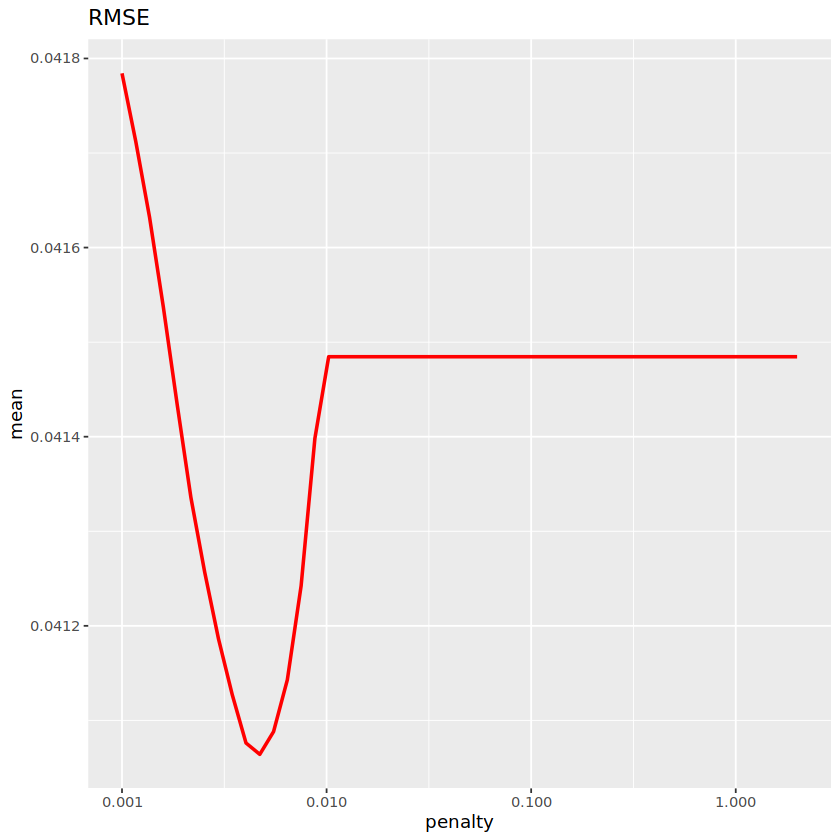

In [64]:
#Tuning L2 
tune_spec_test <- linear_reg(penalty = tune(), mixture = 1) %>% 
  set_engine("glmnet")

lasso_wf_test <- workflow() %>%
  add_recipe(weather_recipe_test)

flight_cvfolds_test <- vfold_cv(test_data)

lambda_grid_test <- grid_regular(levels = 50,
  penalty(range = c(-3, 0.3)))

lasso_grid_test <- tune_grid(
    lasso_wf_test %>% add_model(tune_spec_test), 
    resamples = flight_cvfolds_test, 
    grid = lambda_grid_test)
show_best(lasso_grid_test, metric = "rmse")

lasso_grid_test %>%
  collect_metrics() %>%
  filter(.metric == "rmse") %>%
  ggplot(aes(penalty, mean)) +
  geom_line(size=1, color="red") +
  scale_x_log10() +
  ggtitle("RMSE")

In [83]:
#use lambda= 0.004714866

weather_recipe_test <- recipe(precip ~ ., data = test_data)
ridge_spec_test <- linear_reg(penalty = 0.004714866, mixture = 0.0) %>%
  set_engine("glmnet")
ridge_wf_test <- workflow() %>%
  add_recipe(weather_recipe_test)
ridge_fit_test <- ridge_wf_test %>%
  add_model(ridge_spec_test) %>%
  fit(data = test_data)
ridge_fit_test %>%
  pull_workflow_fit() %>%
  tidy()

test_results6 <- ridge_fit %>%
  # Make the predictions and save the predicted values
  predict(new_data = test_data) %>%
  # Create a new column to save the true values
  mutate(truth = test_data$precip)
head(test_results6)

rmse(test_results6, truth = truth,
     estimate = .pred)

rsq(test_results6, truth = truth,
    estimate = .pred)



term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),2.633708e-01,0.004714866
relative_humidity,4.549797e-04,0.004714866
dry_bulb_temp_f,8.216554e-05,0.004714866
wind_speed,8.903131e-04,0.004714866
station_pressure,-1.001640e-02,0.004714866


.pred,truth
<dbl>,<dbl>
-0.001667932,0.00
0.015617481,0.06
0.020255179,0.03
-0.010328019,0.00
-0.003554748,0.00
0.008202451,0.00


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.05576382


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.03827837


<a id="cell10"></a>
## 10. Find Best Model
Compare the regression metrics of each model from section 9 to find the best model overall. To do this, 

1. Evaluate the models on the **testing set** using at least one metric (like MSE, RMSE or R-squared).
2. After calculating the metrics on the testing set for each model, print them out in as a table to easily compare. You can use something like:
```
model_names <- c("model_1", "model_2", "model_3")
train_error <- c("model_1_value", "model_2_value", "model_3_value")
test_error <- c("model_1_value", "model_2_value", "model_3_value")
comparison_df <- data.frame(model_names, train_error, test_error)
```
3. Finally, from the comparison table you create, conclude which model performed the best.


In [81]:
model_names <- c("precip ~ relative_humidity","precip ~ dry_bulb_temp_f","precip ~ wind_speed","precip ~ station_pressure","precip ~ . Multi Regression", "L2 Regularization")
train_error <- c("0.04623469", "0.00361674637","0.006955089","0.02136029","0.06728923", "0.06727717")
test_error <- c("0.02459572", "0.001792602","0.004105862","0.004105862","0.04023417", "0.03827837")
comparison_df <- data.frame(model_names, train_error, test_error)

comparison_df 

#arrording to the 3 models, precip ~ . Multi Regression fits best

model_names,train_error,test_error
<fct>,<fct>,<fct>
precip ~ relative_humidity,0.04623469,0.02459572
precip ~ dry_bulb_temp_f,0.00361674637,0.001792602
precip ~ wind_speed,0.006955089,0.004105862
precip ~ station_pressure,0.02136029,0.004105862
precip ~ . Multi Regression,0.06728923,0.04023417
L2 Regularization,0.06727717,0.03827837


## Author(s)

<h4> Yiwen Li </h4>

## Contributions

<h4> Tiffany Zhu </h4>

## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
